<a href="https://colab.research.google.com/github/AnnJungChan/youngjin_TECH/blob/main/DeepCandle/candle_chart_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 로딩

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


# 데이터로드

In [62]:
%%time 
import pickle, gzip, urllib.request, json
import numpy as np

with gzip.open('data.pkl.gz','rb') as f: #피클의 주소를 적어주세요!
  train_set, valid_set, test_set = pickle.load(f, encoding = 'latin1')

CPU times: user 15.2 ms, sys: 981 µs, total: 16.2 ms
Wall time: 15.6 ms


# train, vaild, test split

In [63]:
(train_images, train_labels), (valid_images, valid_labels), (test_images, test_labels) = train_set, valid_set, test_set

In [64]:
train_images.shape

(110, 50, 50, 3)

50 by 50 데이터가 불러와진 것을 확인할 수 있다. 데이터가 정상적으로 불러와졌다. 

In [65]:
train_images = train_images.reshape(train_images.shape[0], 50, 50, 3)
valid_images = valid_images.reshape(valid_images.shape[0], 50, 50, 3)
test_images = test_images.reshape(test_images.shape[0], 50, 50, 3)

train_images = train_images.astype('float32')
valid_images = valid_images.astype('float32')
test_images = test_images.astype('float32')

print(train_X.shape)
print(train_images.shape)
print()

(110, 50, 50, 3)
(110, 50, 50, 3)



train_X와 train_images가 차원이 같다. 정상적으로 데이터를 불러온 것이다.

This is a 0


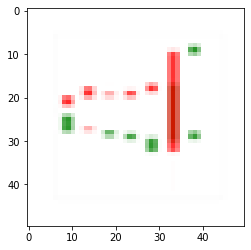

This is a 0


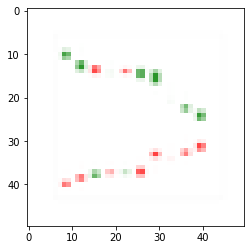

This is a 0


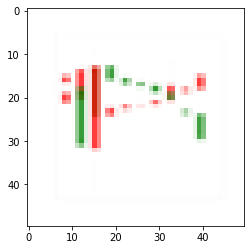

This is a 0


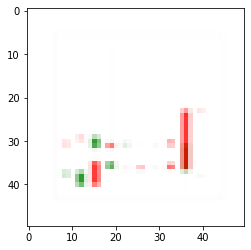

This is a 0


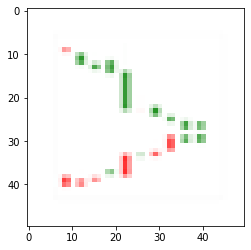

This is a 0


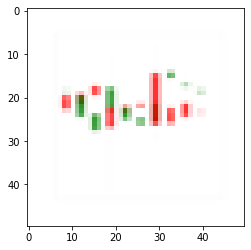

This is a 0


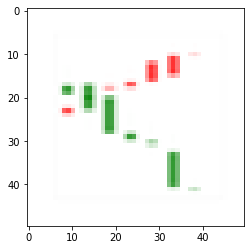

This is a 0


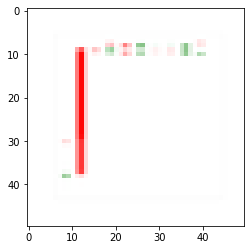

This is a 0


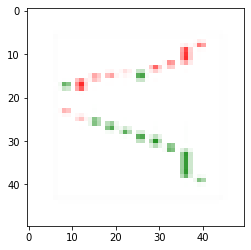

This is a 0


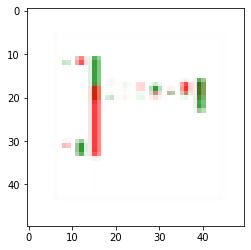

In [115]:
for i in range(0,10):
  img = train_set[0][i]
  label = train_set[1][i]
  img_reshape = img.reshape((50,50,3))
  imgplot = plt.imshow(img_reshape)
  print('This is a {}'.format(label))
  plt.show()

그림파일로 데이터가 잘 로드되는 것을 볼 수 있다.

# 정규화

In [66]:
train_images /= 225
valid_images /= 225
test_images /= 225

# 원핫인코딩

- 라벨링을 문자로 하면 컴퓨터가 알아볼 수 없기 때문에, 정수로 라벨링을 한다.



In [67]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

def encoding_to_int(labels):
    e = LabelEncoder()
    e.fit(labels)
    return e.transform(labels)

n_classes = 2
print("Shape before one-hot encoding: ", train_labels.shape,)
train_labels = np_utils.to_categorical(encoding_to_int(train_labels), n_classes)
valid_labels = np_utils.to_categorical(encoding_to_int(valid_labels), n_classes)
test_labels = np_utils.to_categorical(encoding_to_int(test_labels), n_classes)
print("Shape after one-hot encoding: ", train_labels.shape)

Shape before one-hot encoding:  (110,)
Shape after one-hot encoding:  (110, 2)


# 모델 빌드와 학습

In [116]:
import numpy
import keras.models
import tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

 # building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer1
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

# convolutional layer2
model.add(Conv2D(48, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# convolutinal layer3
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# convolutinal layer4
model.add(Conv2D(96, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# convolutinal layer3
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# convolutional layer2
model.add(Conv2D(48, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Dropout(0.25))

# convolutional layer1
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))


# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
# output layer
model.add(Dense(2, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [117]:
model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(valid_images, valid_labels))

Epoch 1/20
2/2 [==============================] - 1s 280ms/step - loss: 0.6928 - accuracy: 0.5364 - val_loss: 0.6881 - val_accuracy: 0.7568
Epoch 2/20
2/2 [==============================] - 0s 62ms/step - loss: 0.6923 - accuracy: 0.4909 - val_loss: 0.6804 - val_accuracy: 0.7568
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.6882 - accuracy: 0.5273 - val_loss: 0.6635 - val_accuracy: 0.7568
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.6892 - accuracy: 0.5455 - val_loss: 0.6566 - val_accuracy: 0.7568
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.6967 - accuracy: 0.5364 - val_loss: 0.6490 - val_accuracy: 0.7568
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.6975 - accuracy: 0.5182 - val_loss: 0.6632 - val_accuracy: 0.7568
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.6923 - accuracy: 0.5364 - val_loss: 0.6692 - val_accuracy: 0.7568
Epoch 8/20
2/2 [==========

In [118]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

2/2 - 0s - loss: 0.6606 - accuracy: 0.8108 - 30ms/epoch - 15ms/step


학습한 결과는 81%의 정확도를 보이고 있다.

In [122]:
model.predict(test_images)

array([[0.4726594 , 0.5273406 ],
       [0.4726259 , 0.5273741 ],
       [0.4724653 , 0.5275347 ],
       [0.47265515, 0.5273448 ],
       [0.472503  , 0.52749693],
       [0.4725195 , 0.5274805 ],
       [0.47277924, 0.5272208 ],
       [0.47247714, 0.5275229 ],
       [0.47267416, 0.52732587],
       [0.47250667, 0.5274933 ],
       [0.47258985, 0.52741015],
       [0.4726344 , 0.52736557],
       [0.47242227, 0.5275777 ],
       [0.47260574, 0.52739424],
       [0.47254792, 0.5274521 ],
       [0.47254202, 0.52745795],
       [0.47253904, 0.527461  ],
       [0.4728034 , 0.5271966 ],
       [0.4724843 , 0.5275157 ],
       [0.47247562, 0.52752435],
       [0.47252017, 0.5274798 ],
       [0.4727385 , 0.5272615 ],
       [0.47257897, 0.527421  ],
       [0.47266924, 0.52733076],
       [0.4731238 , 0.5268762 ],
       [0.47265747, 0.5273425 ],
       [0.47250542, 0.52749455],
       [0.4727382 , 0.5272618 ],
       [0.47274464, 0.52725536],
       [0.4728357 , 0.52716434],
       [0.

- 하지만, 한쪽값만 편향되게 학습한다는 특성이 있다.
- 지금의 경우는 그냥 한쪽만 일방적으로 맞추고 있어서 오히려 학습을 못한다고 할 수 있다.